# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data = "weather_df.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:

# Base url
url = "http://api.openweathermap.org/data/2.5/weather?"

# Make empty lists for weather features
temperature = []
humidity = []
cloudiness = []
wind_speed = []
countries = []
dates = []
lat = []
long = []
cities_present = []

# Set counters for records and sets
count_record = 0
count_set = 1

# Loop through cities 
for city in cities:
    # Construct query_url
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()

    # Traverse through the json, find relevant data, and append to respective lists
    try:
        temperature.append(weather_json["main"]["temp_max"])
        humidity.append(weather_json["main"]["humidity"])
        cloudiness.append(weather_json["clouds"]["all"])
        wind_speed.append(weather_json["wind"]["speed"])
        countries.append(weather_json["sys"]["country"])
        dates.append(weather_json["dt"])
        lat.append(weather_json["coord"]["lat"])
        long.append(weather_json["coord"]["lon"])
        
        # Organize the city count records into 12 sets of 50 each 
        if count_record > 49:
            count_record = 0
            count_set += 1
            # Append the cities found into a list called cities_present
            cities_present.append(city)
        else:
            count_record += 1
            # Append the cities found into a list called cities_present
            cities_present.append(city)
        print(f"Processing Record {count_record} of Set {count_set} | {city}")
        
    # Handle exceptions by KeyError
    except KeyError:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")    

Processing Record 1 of Set 1 | bonfim
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | khatanga
Processing Record 4 of Set 1 | mahebourg
Processing Record 5 of Set 1 | nemuro
City not found. Skipping...
Processing Record 6 of Set 1 | cidreira
Processing Record 7 of Set 1 | tabuk
Processing Record 8 of Set 1 | goba
Processing Record 9 of Set 1 | vardo
Processing Record 10 of Set 1 | shingu
Processing Record 11 of Set 1 | marrakesh
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | phan thiet
Processing Record 14 of Set 1 | puerto colombia
Processing Record 15 of Set 1 | arraial do cabo
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | cape town
City not found. Skipping...
Processing Record 18 of Set 1 | hermanus
City not found. Skipping...
Processing Record 19 of Set 1 | punta arenas
City not found. Skipping...
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | port hardy
Processing Record 22 of Set 1 |

Processing Record 40 of Set 4 | qatana
Processing Record 41 of Set 4 | mutsu
Processing Record 42 of Set 4 | karwar
Processing Record 43 of Set 4 | naze
City not found. Skipping...
Processing Record 44 of Set 4 | chokurdakh
Processing Record 45 of Set 4 | mattru
Processing Record 46 of Set 4 | trelew
Processing Record 47 of Set 4 | morogoro
Processing Record 48 of Set 4 | apiai
Processing Record 49 of Set 4 | seinajoki
City not found. Skipping...
Processing Record 50 of Set 4 | morant bay
Processing Record 0 of Set 5 | te anau
Processing Record 1 of Set 5 | usakos
Processing Record 2 of Set 5 | clyde river
Processing Record 3 of Set 5 | denpasar
Processing Record 4 of Set 5 | amga
Processing Record 5 of Set 5 | salalah
Processing Record 6 of Set 5 | torbay
City not found. Skipping...
City not found. Skipping...
Processing Record 7 of Set 5 | jacareacanga
Processing Record 8 of Set 5 | steamboat springs
Processing Record 9 of Set 5 | salinopolis
Processing Record 10 of Set 5 | qui nhon


Processing Record 21 of Set 8 | abashiri
Processing Record 22 of Set 8 | sterling
City not found. Skipping...
Processing Record 23 of Set 8 | upata
Processing Record 24 of Set 8 | morden
Processing Record 25 of Set 8 | inuvik
Processing Record 26 of Set 8 | ixtapa
Processing Record 27 of Set 8 | laizhou
Processing Record 28 of Set 8 | diamantino
City not found. Skipping...
Processing Record 29 of Set 8 | alofi
Processing Record 30 of Set 8 | talawakele
City not found. Skipping...
Processing Record 31 of Set 8 | kralendijk
Processing Record 32 of Set 8 | ajdabiya
Processing Record 33 of Set 8 | gambela
Processing Record 34 of Set 8 | mezen
Processing Record 35 of Set 8 | ambon
Processing Record 36 of Set 8 | monrovia
Processing Record 37 of Set 8 | husavik
City not found. Skipping...
Processing Record 38 of Set 8 | caravelas
Processing Record 39 of Set 8 | muros
Processing Record 40 of Set 8 | kathu
Processing Record 41 of Set 8 | arkhipo-osipovka
Processing Record 42 of Set 8 | yerboga

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dicts = {
    "City":cities_present,
    "Lat":lat,
    "Lng":long,
    "Max Temp": temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": countries,
    "Date": dates,
    
}
# Create a DataFrame using the dictionary
weather_df = pd.DataFrame(weather_dicts)
weather_df

#Export as csv
weather_df.to_csv("../weather_df.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
#There are no cities where humidity is over 100%
#  Get the indices of cities that have humidity over 100%.
humidity_100 = weather_df.Humidity
over100 = humidity_100>100
over100

0      False
1      False
2      False
3      False
4      False
       ...  
539    False
540    False
541    False
542    False
543    False
Name: Humidity, Length: 544, dtype: bool

In [6]:
# Export the City_Data into a csv
# city_data.to_csv("../cities_df.csv", index = False)
# city_data.head

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

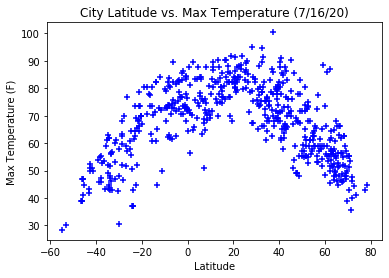

In [7]:
# Getting the x, y data 
x_values = weather_df["Lat"]
y_values = weather_df["Max Temp"]
# Plotting 
plt.scatter(x_values, y_values, marker="+", facecolors="blue", edgecolors="white", alpha=1)
# Putting the x, y, and title labels
plt.title("City Latitude vs. Max Temperature (7/16/20)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig("../Figures/Latitude vs. Temperature.png")

## Latitude vs. Humidity Plot

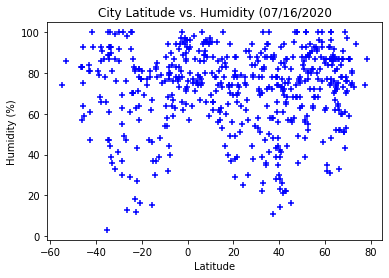

In [8]:
# Getting the x, y data 
x_values = weather_df["Lat"]
y_values = weather_df["Humidity"]
# Plotting 
plt.scatter(x_values, y_values, marker="+", facecolors="blue", edgecolors="white", alpha=1)
# Putting the x, y, and title labels
plt.title("City Latitude vs. Humidity (07/16/2020")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("../Figures/Latitude vs. Humidity.png")

## Latitude vs. Cloudiness Plot

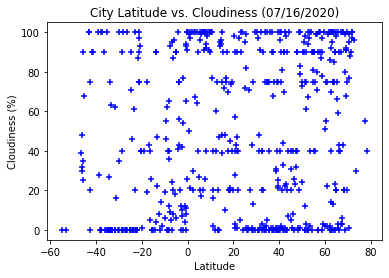

In [9]:
# Getting the x, y data 
x_values = weather_df["Lat"]
y_values = weather_df["Cloudiness"]
# Plotting  
plt.scatter(x_values, y_values, marker="+", facecolors="blue", edgecolors="white", alpha=1)
# Putting the x, y, and title labels
plt.title("City Latitude vs. Cloudiness (07/16/2020)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("../Figures/Latitude vs. Cloudiness.png")

## Latitude vs. Wind Speed Plot

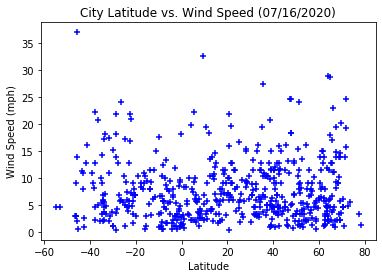

In [10]:
# Getting the x, y data 
x_values = weather_df["Lat"]
y_values = weather_df["Wind Speed"]
# Plotting 
plt.scatter(x_values, y_values, marker="+", facecolors="blue", edgecolors="white", alpha=1)
# Putting the x, y, and title labels
plt.title("City Latitude vs. Wind Speed (07/16/2020)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("../Figures/Latitude vs. Wind Speed.png")

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(x, y, y_label, text_coordinates, name, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.title(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.savefig(f"../Figures/{name}.png")
    plt.show()

In [12]:
# Create Northern and Southern Hemisphere DataFrames
northernhemisphere = weather_df.loc[weather_df["Lat"] >= 0]
southernhemisphere = weather_df.loc[weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4737026456080796


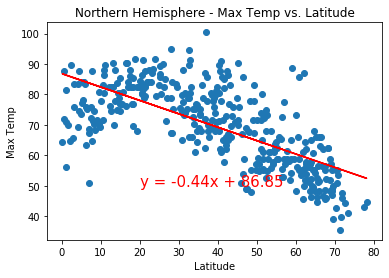

In [13]:
# Plot linear regression for Northern Hemisphere max temp vs. latitude  
nlat = northernhemisphere["Lat"]
ntemp = northernhemisphere["Max Temp"]
plot_linear_regression(nlat, ntemp, "Max Temp", (20,50), "Northern Hemisphere - Max Temp vs. Latitude", "Northern Hemisphere - Max Temp vs. Latitude")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6419628438371183


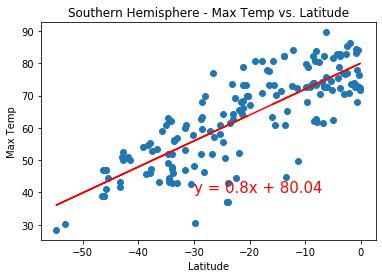

In [14]:

#  Southern Hemisphere - Max Temp vs. Latitude Linear Regression
slat = southernhemisphere["Lat"]
stemp = southernhemisphere["Max Temp"]
plot_linear_regression(slat, stemp, "Max Temp", (-30,40), "Southern Hemisphere - Max Temp vs. Latitude", "Southern Hemisphere - Max Temp vs. Latitude")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00013038351683905086


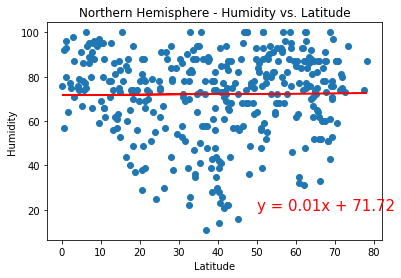

In [15]:
# Plot linear regression for Northern Hemisphere humidity vs. latitude  
nlat = northernhemisphere["Lat"]
nhumidity = northernhemisphere["Humidity"]
plot_linear_regression(nlat, nhumidity, "Humidity", (50,20), "Northern Hemisphere - Humidity vs. Latitude", "Northern Hemisphere - Humidity vs. Latitude")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.002099827939081125


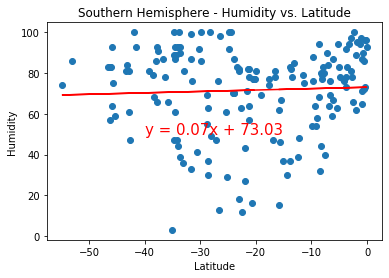

In [16]:
# Plot linear regression for Southern Hemisphere humidity vs. latitude  
slat = southernhemisphere["Lat"]
shumidity = southernhemisphere["Humidity"]
plot_linear_regression(slat, shumidity, "Humidity", (-40,50), "Southern Hemisphere - Humidity vs. Latitude", "Southern Hemisphere - Humidity vs. Latitude")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 4.156705900059725e-05


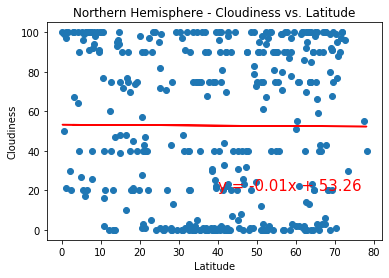

In [17]:
# Plot linear regression for Northern Hemisphere cloudiness vs. latitude  
nlat = northernhemisphere["Lat"]
ncloudiness = northernhemisphere["Cloudiness"]
plot_linear_regression(nlat, ncloudiness, "Cloudiness", (40,20), "Northern Hemisphere - Cloudiness vs. Latitude", "Northern Hemisphere - Cloudiness vs. Latitude")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0028441320698264134


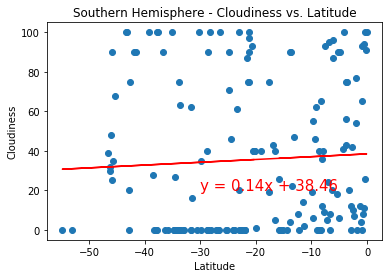

In [18]:
# Plot linear regression for Southern Hemisphere cloudiness vs. latitude  
slat = southernhemisphere["Lat"]
scloudiness = southernhemisphere["Cloudiness"]
plot_linear_regression(slat, scloudiness, "Cloudiness", (-30,20), "Southern Hemisphere - Cloudiness vs. Latitude", "Southern Hemisphere - Cloudiness vs. Latitude")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.001975386289786443


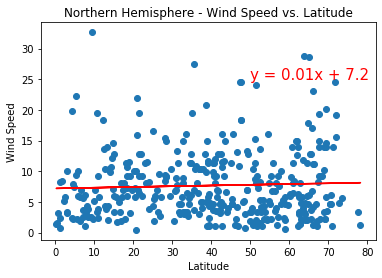

In [19]:
# Plot linear regression for Northern Hemisphere wind speed vs. latitude
nlat = northernhemisphere["Lat"]
nwindspeed = northernhemisphere["Wind Speed"]
plot_linear_regression(nlat, nwindspeed, "Wind Speed", (50,25), "Northern Hemisphere - Wind Speed vs. Latitude", "Northern Hemisphere - Wind Speed vs. Latitude")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.043035293950388014


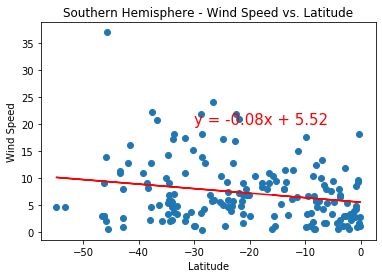

In [20]:
# Plot linear regression for Southern Hemisphere wind speed vs. latitude
slat = southernhemisphere["Lat"]
swindspeed = southernhemisphere["Wind Speed"]
plot_linear_regression(slat, swindspeed, "Wind Speed", (-30,20), "Southern Hemisphere - Wind Speed vs. Latitude", "Southern Hemisphere - Wind Speed vs. Latitude")